**First let's import all the libraries and frameworks that we will use:**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

**Also, let's load the csv file (available at kaggle: https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star)**

In [2]:
df = pd.read_csv('pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


**We are going to define the a list with the name of the columns, we will use it to normalize the features.**

In [4]:
column_list = df.columns.tolist()
column_list[:5]

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve']

**This is the normalization step:**

In [5]:
df_norm = pd.DataFrame()

for column in column_list:
    df_norm[column] = df[column]/(df[column].abs().max())

df_norm.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.729751,0.563721,-0.029069,-0.010274,0.014324,0.172723,0.230908,0.062336,0.0
1,0.532184,0.596103,0.057664,-0.007564,0.007508,0.134308,0.306211,0.106963,0.0
2,0.534821,0.398280,0.040068,0.015435,0.013972,0.196531,0.223968,0.053041,0.0
3,0.709957,0.578853,-0.008478,-0.009342,0.016308,0.189433,0.199668,0.044999,0.0
4,0.460637,0.411750,0.074461,0.016497,0.005277,0.103656,0.413134,0.212063,0.0


In [6]:
df_norm.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,0.576688,0.471250,0.059218,0.025995,0.056468,0.237943,0.240405,0.088042,0.091574
std,0.133181,0.069278,0.131859,0.090569,0.131933,0.175978,0.130461,0.089433,0.288432
min,0.030176,0.250783,-0.232481,-0.026312,0.000954,0.066615,-0.090888,-0.001660,0.000000
25%,0.523991,0.428999,0.003358,-0.002769,0.008609,0.130487,0.167387,0.029354,0.000000
50%,0.597445,0.475278,0.027665,0.002918,0.012542,0.166856,0.244168,0.069743,0.000000
75%,0.659785,0.516539,0.058656,0.013624,0.024460,0.256937,0.309873,0.116968,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Let's take a look at the correlation matrix (in absolute values)**

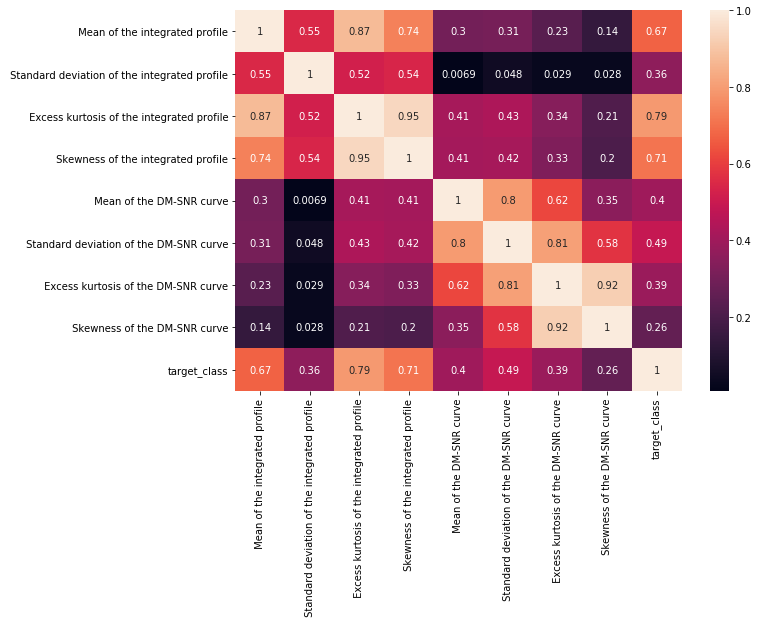

In [7]:
plt.figure(figsize=(10, 7))
corr = df_norm.corr()
corr = abs(corr)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

**At this point we see there is space to add some features. Having the mean and the standard deviation of the integrated profile and the DM-SNR curve, gives us an idea... Let's add 3 standard deviations at each side of the mean...** <br>
![normal distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.PNG) Image source: Wikipedia (https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.PNG)

In [8]:
df['ip_std_p1'] = df[' Mean of the integrated profile'] + df[' Standard deviation of the integrated profile']
df['ip_std_p2'] = df[' Mean of the integrated profile'] + (2 * df[' Standard deviation of the integrated profile'])
df['ip_std_p3'] = df[' Mean of the integrated profile'] + (3 * df[' Standard deviation of the integrated profile'])
df['ip_std_m1'] = df[' Mean of the integrated profile'] - df[' Standard deviation of the integrated profile']
df['ip_std_m2'] = df[' Mean of the integrated profile'] - (2 * df[' Standard deviation of the integrated profile'])
df['ip_std_m3'] = df[' Mean of the integrated profile'] - (3 * df[' Standard deviation of the integrated profile'])
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class,ip_std_p1,ip_std_p2,ip_std_p3,ip_std_m1,ip_std_m2,ip_std_m3
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,196.246282,251.930064,307.613846,84.878718,29.194936,-26.488846
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,161.390243,220.272673,279.155103,43.625382,-15.257048,-74.139478
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,142.357274,181.698924,221.040573,63.673976,24.332326,-15.009323
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,193.928449,251.106897,308.285346,79.571551,22.393103,-34.785346
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,129.398788,170.071013,210.743239,48.054337,7.382112,-33.290114


In [9]:
df['DM_std_p1'] = df[' Mean of the DM-SNR curve'] + df[' Standard deviation of the DM-SNR curve']
df['DM_std_p2'] = df[' Mean of the DM-SNR curve'] + (2 * df[' Standard deviation of the DM-SNR curve'])
df['DM_std_p3'] = df[' Mean of the DM-SNR curve'] + (3 * df[' Standard deviation of the DM-SNR curve'])
df['DM_std_m1'] = df[' Mean of the DM-SNR curve'] - df[' Standard deviation of the DM-SNR curve']
df['DM_std_m2'] = df[' Mean of the DM-SNR curve'] - (2 * df[' Standard deviation of the DM-SNR curve'])
df['DM_std_m3'] = df[' Mean of the DM-SNR curve'] - (3 * df[' Standard deviation of the DM-SNR curve'])
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class,ip_std_p1,ip_std_p2,ip_std_p3,ip_std_m1,ip_std_m2,ip_std_m3,DM_std_p1,DM_std_p2,DM_std_p3,DM_std_m1,DM_std_m2,DM_std_m3
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,196.246282,251.930064,307.613846,84.878718,29.194936,-26.488846,22.310259,41.420685,60.531112,-15.910594,-35.021020,-54.131446
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,161.390243,220.272673,279.155103,43.625382,-15.257048,-74.139478,16.537403,31.397549,46.257695,-13.182888,-28.043034,-42.903180
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,142.357274,181.698924,221.040573,63.673976,24.332326,-15.009323,24.865906,46.610575,68.355244,-18.623431,-40.368100,-62.112769
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,193.928449,251.106897,308.285346,79.571551,22.393103,-34.785346,24.602257,45.561537,66.520817,-17.316304,-38.275584,-59.234864
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,129.398788,170.071013,210.743239,48.054337,7.382112,-33.290114,12.647649,24.116369,35.585089,-10.289790,-21.758509,-33.227229


**Here we are just reaordering the features to have the target in the last column.**

In [10]:
column_list = df.columns.tolist()
column_list.pop(column_list.index('target_class'))
column_list.append('target_class')
column_list

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'ip_std_p1',
 'ip_std_p2',
 'ip_std_p3',
 'ip_std_m1',
 'ip_std_m2',
 'ip_std_m3',
 'DM_std_p1',
 'DM_std_p2',
 'DM_std_p3',
 'DM_std_m1',
 'DM_std_m2',
 'DM_std_m3',
 'target_class']

In [11]:
df = df[column_list]
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,ip_std_p1,ip_std_p2,ip_std_p3,ip_std_m1,ip_std_m2,ip_std_m3,DM_std_p1,DM_std_p2,DM_std_p3,DM_std_m1,DM_std_m2,DM_std_m3,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,196.246282,251.930064,307.613846,84.878718,29.194936,-26.488846,22.310259,41.420685,60.531112,-15.910594,-35.021020,-54.131446,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,161.390243,220.272673,279.155103,43.625382,-15.257048,-74.139478,16.537403,31.397549,46.257695,-13.182888,-28.043034,-42.903180,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,142.357274,181.698924,221.040573,63.673976,24.332326,-15.009323,24.865906,46.610575,68.355244,-18.623431,-40.368100,-62.112769,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,193.928449,251.106897,308.285346,79.571551,22.393103,-34.785346,24.602257,45.561537,66.520817,-17.316304,-38.275584,-59.234864,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,129.398788,170.071013,210.743239,48.054337,7.382112,-33.290114,12.647649,24.116369,35.585089,-10.289790,-21.758509,-33.227229,0


**This might look like a repeated step, but here we added the new features to teh column list, and redefine 'df_norm' to normalize the data frame with the new features.**

In [12]:
column_list = df.columns.tolist()
df_norm = pd.DataFrame()

for column in column_list:
    df_norm[column] = df[column]/(df[column].abs().max())

df_norm.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,ip_std_p1,ip_std_p2,ip_std_p3,ip_std_m1,ip_std_m2,ip_std_m3,DM_std_p1,DM_std_p2,DM_std_p3,DM_std_m1,DM_std_m2,DM_std_m3,target_class
0,0.729751,0.563721,-0.029069,-0.010274,0.014324,0.172723,0.230908,0.062336,0.786422,0.777152,0.740565,0.618415,0.254906,-0.132226,0.081918,0.112689,0.128375,-0.082103,-0.211945,-0.222761,0.0
1,0.532184,0.596103,0.057664,-0.007564,0.007508,0.134308,0.306211,0.106963,0.646742,0.679496,0.672052,0.317849,-0.133212,-0.370088,0.060721,0.085420,0.098104,-0.068027,-0.169715,-0.176554,0.0
2,0.534821,0.398280,0.040068,0.015435,0.013972,0.196531,0.223968,0.053041,0.570471,0.560504,0.532144,0.463920,0.212450,-0.074923,0.091301,0.126809,0.144968,-0.096102,-0.244306,-0.255605,0.0
3,0.709957,0.578853,-0.008478,-0.009342,0.016308,0.189433,0.199668,0.044999,0.777134,0.774613,0.742182,0.579747,0.195518,-0.173641,0.090333,0.123955,0.141078,-0.089357,-0.231642,-0.243762,0.0
4,0.460637,0.411750,0.074461,0.016497,0.005277,0.103656,0.413134,0.212063,0.518542,0.524634,0.507354,0.350117,0.064454,-0.166177,0.046439,0.065611,0.075469,-0.053098,-0.131681,-0.136736,0.0


**Let's take a look at the new correlation matrix:**

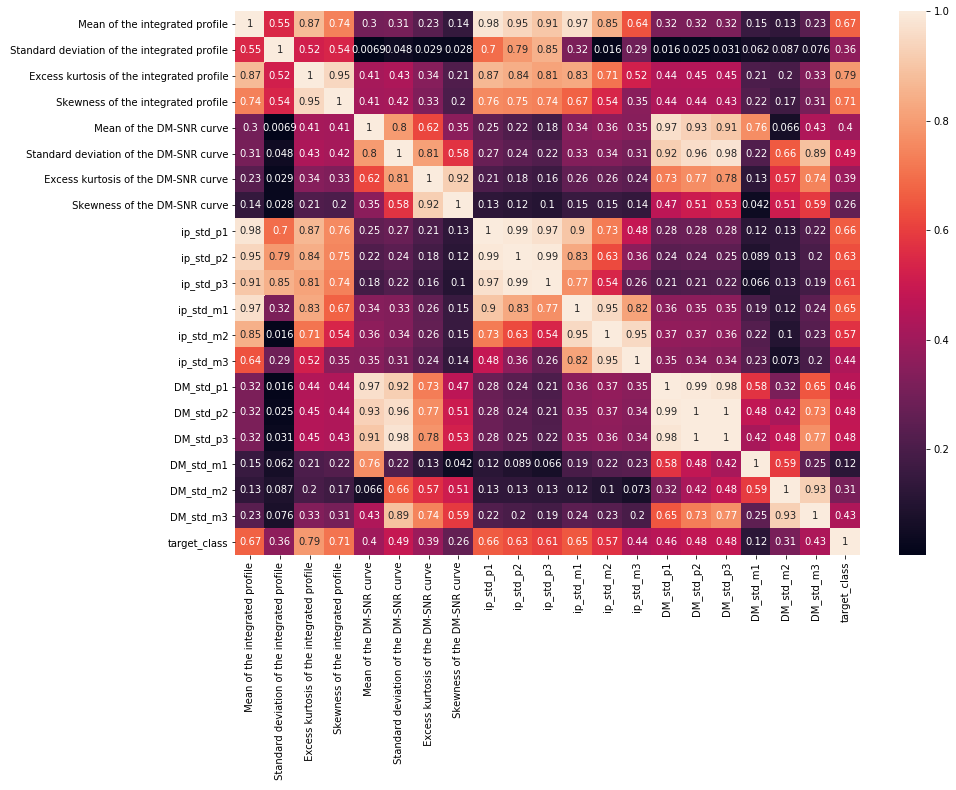

In [13]:
plt.figure(figsize=(14, 10))
corr = df_norm.corr()
corr = abs(corr)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

**In this particular case, this step doesn't add a lot of value because almost all of the features are highly correlated with the target, but it is a good practice to remove the features with very low correlation (less than 0.01)**

In [14]:
new_col_list = corr['target_class'][corr['target_class']>=0.01]
print (len(new_col_list))
new_col_list.index.tolist()

21


[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'ip_std_p1',
 'ip_std_p2',
 'ip_std_p3',
 'ip_std_m1',
 'ip_std_m2',
 'ip_std_m3',
 'DM_std_p1',
 'DM_std_p2',
 'DM_std_p3',
 'DM_std_m1',
 'DM_std_m2',
 'DM_std_m3',
 'target_class']

**All we are doing here is removing the target from the column list**

In [15]:
new_col_list = new_col_list.index.tolist()
new_col_list = new_col_list[:(len(new_col_list)-1)]
new_col_list[-5:]

['DM_std_p2', 'DM_std_p3', 'DM_std_m1', 'DM_std_m2', 'DM_std_m3']

**This is an important step; we are randomizing the data frame. We want to have a train set, validation set and test set with a similar ratio of positive targets (that's why we want to add a RandomState and later check that ratio)**

In [0]:
index_list = df_norm.index.tolist()

random_index_list = np.random.RandomState(7).choice(index_list, len(index_list), replace=False).tolist()

train_total = int(len(index_list)*0.6)
train_index_list = random_index_list[:train_total]

validation_total = int(len(index_list)*0.2)
validation_index_list = random_index_list[train_total:(train_total + validation_total+ 1)]

test_index_list = random_index_list[(train_total + validation_total + 1):]

#print('train index list (first 5): ', train_index_list[:5])
#print('validation index list (first 5): ', validation_index_list[:5])
#print('test index list (first 5): ', test_index_list[:5])

In [0]:
train_df = df.iloc[train_index_list]
validation_df = df.iloc[validation_index_list]
test_df = df.iloc[test_index_list]

#print ('train df head: ', train_df.head())
#print ('train df head: ', validation_df.head())
#print ('train df head: ', test_df.head())

**This is where we check the positive target ratio of all three data sets. As we see the ratios are very similar, we are good to go!**

In [18]:
train_set_sum = df_norm['target_class'][train_index_list].sum()
train_set_total = df_norm['target_class'][train_index_list].count()
train_set_ratio = 1000*(train_set_sum/train_set_total)

val_set_sum = df_norm['target_class'][validation_index_list].sum()
val_set_total = df_norm['target_class'][validation_index_list].count()
val_set_ratio = 1000*(val_set_sum/val_set_total)

test_set_sum = df_norm['target_class'][test_index_list].sum()
test_set_total = df_norm['target_class'][test_index_list].count()
test_set_ratio = 1000*(test_set_sum/test_set_total)

print('Training set; Positive:', train_set_sum, 'Total: ', train_set_total, 'Ratio: ', train_set_ratio)
print('Validation set; Positive:', val_set_sum, 'Total: ', val_set_total, 'Ratio: ', val_set_ratio)
print('Test set; Positive:', test_set_sum, 'Total: ', test_set_total, 'Ratio: ', test_set_ratio)
print(train_set_sum + val_set_sum + test_set_sum)

Training set; Positive: 989.0 Total:  10738 Ratio:  92.10281244179549
Validation set; Positive: 328.0 Total:  3580 Ratio:  91.62011173184358
Test set; Positive: 322.0 Total:  3580 Ratio:  89.94413407821229
1639.0


**Here we are defining the data sets as 'X_...' and the targets as 'y_...' we also want to make sure that the targets are categorical!**

In [0]:
X_train = train_df[new_col_list]
X_val = validation_df[new_col_list]
X_test = test_df[new_col_list]

y_train = tf.keras.utils.to_categorical(df_norm['target_class'][train_index_list], num_classes= df_norm['target_class'][train_index_list].nunique())
y_val = tf.keras.utils.to_categorical(df_norm['target_class'][validation_index_list], num_classes= df_norm['target_class'][validation_index_list].nunique())
y_test = tf.keras.utils.to_categorical(df_norm['target_class'][test_index_list], num_classes= df_norm['target_class'][test_index_list].nunique())

**All we are doing here is checking the size of the data sets**

In [20]:
print(X_train.shape, len(y_train))
print(X_val.shape, len(y_val))
print(X_test.shape, len(y_test))

(10738, 20) 10738
(3580, 20) 3580
(3580, 20) 3580


In [21]:
(X_train.shape[1],)

(20,)

**Here we are defining f1 score and f1 loss to have it later as custom metrics**

In [22]:
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

Using TensorFlow backend.


**We are ready to define the model:**

*   Model: Sequential
*   Neurons per layer: 16
*   Input shape: 20
*   Hidden layers: 2
*   Classes: 2
*   Regularization: L2 0.03
*   Activation functions: Relu (expect for output layer softmax)


In [23]:
num_classes = 2

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(16, 
                              activation = 'relu', 
                              input_shape = (X_train.shape[1],),
                              kernel_regularizer=tf.keras.regularizers.l2(0.03)),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(16, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 770
Trainable params: 706
Non-trainable params: 64
_________________________________________________________________


**We are going to train our model with:**

*   Batch size: 20
*   Epochs: 50
*   Optimizer: Adam
*   Loss Categorical Crossentropy
*   Metrics: accuracy, False Negatives and f1

In [24]:
batch_size = 20
epochs = 50
optimizer = 'adam'

#Definition of the settings
model.compile(loss='categorical_crossentropy',
              #optimizer = tf.keras.optimizers.RMSprop(lr=1e-3),
              optimizer=optimizer,
              metrics=['acc', tf.keras.metrics.FalseNegatives(), f1])

# Training of the network
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_val, y_val),
          verbose=1)

test_loss, test_acc, test_false_negatives, f1_test = model.evaluate(X_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test false negatives:', test_false_negatives)
print('Test F1 Score:', f1_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10738 samples, validate on 3580 samples
Epoch 1/50
10738/10738 [==============================] - 5s 460us/sample - loss: 0.7831 - acc: 0.8958 - false_negatives: 1119.0000 - f1: 0.7575 - val_loss: 0.3704 - val_acc: 0.9732 - val_false_negatives: 96.0000 - val_f1: 0.8290
Epoch 2/50
10738/10738 [==============================] - 3s 256us/sample - loss: 0.2815 - acc: 0.9678 - false_negatives: 346.0000 - f1: 0.8225 - val_loss: 0.2050 - val_acc: 0.9740 - val_false_negatives: 93.0000 - val_f1: 0.8366
Epoch 3/50
10738/10738 [==============================] - 3s 269us/sample - loss: 0.1957 - acc: 0.9683 - false_negatives: 340.0000 - f1: 0.8286 - val_loss: 0.1631 - val_acc: 0.9718 - val_false_negatives: 101.0000 - val_f1: 0.8084
Epoch 4/50
10738/10738 [==============================] - 3s 270us/sample - loss: 0.1615 - acc: 0.9668 - false_negatives: 356.0000 - f1: 0.8199 - val_loss: 0.1773 - val

**Here we want to save the list of some values to plot later on...**

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
f1_list = history.history['f1']
val_f1_list = history.history['val_f1']
false_negative_list = (history.history['false_negatives'])
val_false_negative_list = (history.history['val_false_negatives'])
loss = history.history['loss']
val_loss = history.history['val_loss']

**Now we want to keep training our model with some changes:**

*   Batch size: 20
*   Epochs: 250 (total of 300)
*   Optimizer: Adagrad
*   Loss Categorical Crossentropy
*   Metrics: accuracy, False Negatives and f1

In [26]:
batch_size = 20
epochs = 300
optimizer = 'adagrad'

#Definition of the settings
model.compile(loss='categorical_crossentropy',
              #optimizer = tf.keras.optimizers.RMSprop(lr=1e-3),
              optimizer=optimizer,
              metrics=['acc', tf.keras.metrics.FalseNegatives(), f1])

# Training of the network
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_val, y_val),
          verbose=1)

test_loss, test_acc, test_false_negatives, f1_test = model.evaluate(X_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Test false negatives:', test_false_negatives)
print('Test F1 Score:', f1_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 10738 samples, validate on 3580 samples
Epoch 1/300
10738/10738 [==============================] - 3s 305us/sample - loss: 0.1020 - acc: 0.9696 - false_negatives_1: 326.0000 - f1: 0.8271 - val_loss: 0.0847 - val_acc: 0.9768 - val_false_negatives_1: 83.0000 - val_f1: 0.8402
Epoch 2/300
10738/10738 [==============================] - 3s 260us/sample - loss: 0.1015 - acc: 0.9715 - false_negatives_1: 306.0000 - f1: 0.8253 - val_loss: 0.0879 - val_acc: 0.9760 - val_false_negatives_1: 86.0000 - val_f1: 0.8296
Epoch 3/300
10738/10738 [==============================] - 3s 258us/sample - loss: 0.1003 - acc: 0.9705 - false_negatives_1: 317.0000 - f1: 0.8283 - val_loss: 0.0843 - val_acc: 0.9768 - val_false_negatives_1: 83.0000 - val_f1: 0.8249
Epoch 4/300
10738/10738 [==============================] - 3s 291us/sample - loss: 0.0980 - acc: 0.9724 - false_negatives_1: 296.00

**As we see, we should be happy with all metrics:**

*   Accuracy: 97.88%
*   False negatives: 76
*   F1 score: 0.9117

**Now we want to append the new list of values to plot...**

In [0]:
for i in history.history['acc']:
    acc.append(i)

for i in history.history['val_acc']:
    val_acc.append(i)

for i in history.history['f1']:
    f1_list.append(i)

for i in history.history['val_f1']:
    val_f1_list.append(i)

for i in history.history['false_negatives_1']:
    false_negative_list.append(i)

for i in history.history['val_false_negatives_1']:
    val_false_negative_list.append(i)

for i in history.history['loss']:
    loss.append(i)

for i in history.history['val_loss']:
    val_loss.append(i)

**Finally, we want to plot all the results...**

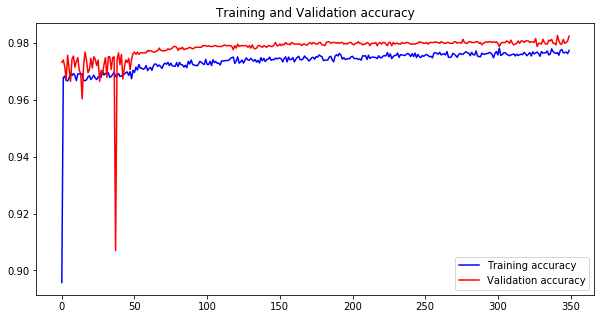

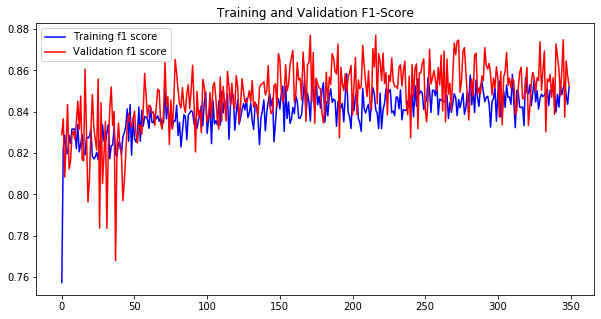

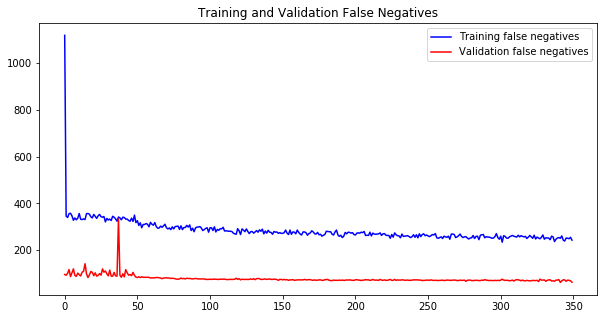

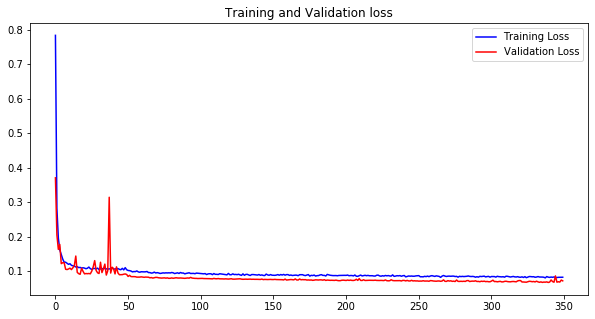

In [28]:
import matplotlib.pyplot as plt

epochs = range(len(acc))

plt.figure(figsize=(10, 5))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, f1_list, 'b', label='Training f1 score')
plt.plot(epochs, val_f1_list, 'r', label='Validation f1 score')
plt.title('Training and Validation F1-Score')
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, false_negative_list, 'b', label='Training false negatives')
plt.plot(epochs, val_false_negative_list, 'r', label='Validation false negatives')
plt.title('Training and Validation False Negatives')
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

**And now, just to double check that we did the right thing, we will plot only the last 300 epochs to see if the loss still decreased (which it did.) We can also see that at the very end, we start to se high fluctuations, so se can say that after 250 epochs (300 epochs in total), the model with the current hyperparameters starts to show instability.**

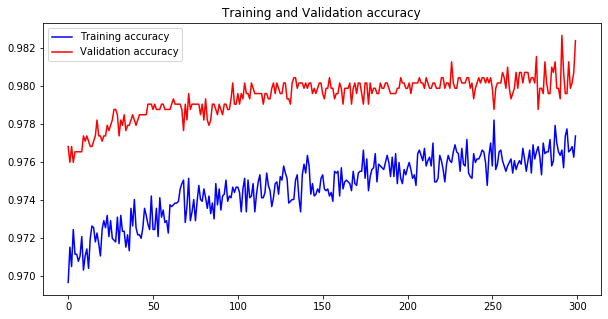

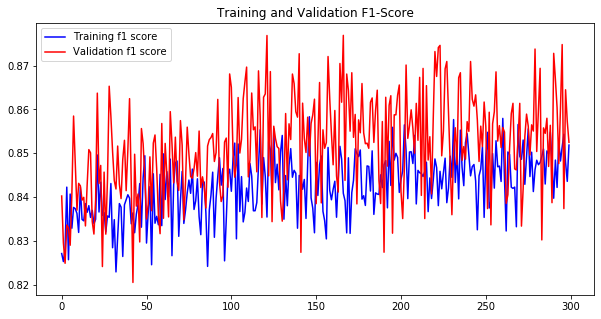

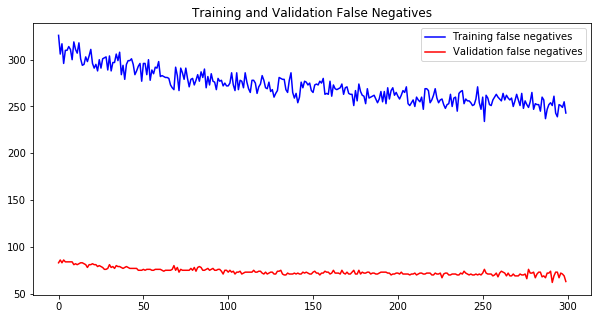

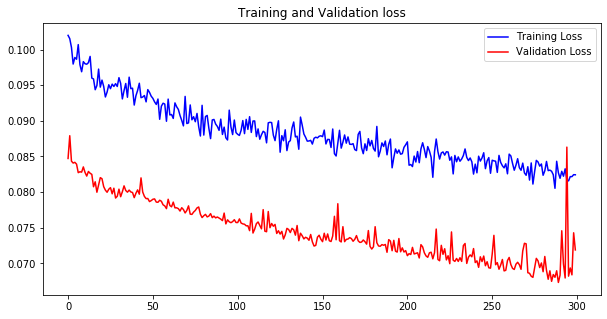

In [29]:
acc_list = history.history['acc']
val_acc_list = history.history['val_acc']
f1_list = history.history['f1']
val_f1_list = history.history['val_f1']
false_negatives_list = history.history['false_negatives_1']
val_false_negatives_list = history.history['val_false_negatives_1']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc_list))

plt.figure(figsize=(10, 5))

plt.plot(epochs, acc_list, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_list, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, f1_list, 'b', label='Training f1 score')
plt.plot(epochs, val_f1_list, 'r', label='Validation f1 score')
plt.title('Training and Validation F1-Score')
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, false_negatives_list, 'b', label='Training false negatives')
plt.plot(epochs, val_false_negatives_list, 'r', label='Validation false negatives')
plt.title('Training and Validation False Negatives')
plt.legend()

plt.figure(figsize=(10, 5))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()